In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv')

In [20]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
diabetes_df = diabetes[['Glucose', 'BloodPressure', 'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'	]].replace(0, np.nan)

In [24]:
#ADD NEW COLUMN TO THE EXISTING DATAFRAME

diabetes_df['Pregnancies'] = diabetes['Pregnancies']

In [25]:
diabetes_df['Outcome'] = diabetes['Outcome']

In [26]:
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,NaN,33.6,0.627,50,6,1
1,85.0,66.0,29.0,NaN,26.6,0.351,31,1,0
2,183.0,64.0,NaN,NaN,23.3,0.672,32,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63,10,0
764,122.0,70.0,27.0,NaN,36.8,0.340,27,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30,5,0
766,126.0,60.0,NaN,NaN,30.1,0.349,47,1,1


In [27]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Pregnancies                   0
Outcome                       0
dtype: int64

In [28]:
diabetes_df['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [29]:
diabetes_df['SkinThickness'].unique()

array([35., 29., nan, 23., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

In [30]:
val_insulin = np.round(diabetes_df['Insulin'].mean())

In [31]:
diabetes_df['Insulin'].replace(np.nan,val_insulin, inplace = True)

In [32]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Pregnancies                   0
Outcome                       0
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
d_array = imputer.fit_transform(diabetes_df)

In [35]:
diabetes_df2 = pd.DataFrame( d_array, columns = diabetes_df.columns)

In [36]:
diabetes_df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6.0,1.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1.0,0.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0,0.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10.0,0.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5.0,0.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0,1.0,1.0


In [37]:
#c axis = 1 dropping entire column 

diabetes_df2.drop(['Outcome'], axis = 1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0,1.0


In [38]:
# axis = 0 dropping entire rows

diabetes_df2.drop([0,1,2,3,4,5,6], axis = 0)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
7,115.0,72.0,29.0,156.0,35.3,0.134,29.0,10.0,0.0
8,197.0,70.0,45.0,543.0,30.5,0.158,53.0,2.0,1.0
9,125.0,96.0,29.0,156.0,32.3,0.232,54.0,8.0,1.0
10,110.0,92.0,29.0,156.0,37.6,0.191,30.0,4.0,0.0
11,168.0,74.0,29.0,156.0,38.0,0.537,34.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10.0,0.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5.0,0.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0,1.0,1.0


In [39]:
diabetes_df2.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

In [40]:
diabetes_df2['Outcome'].unique()

array([1., 0.])

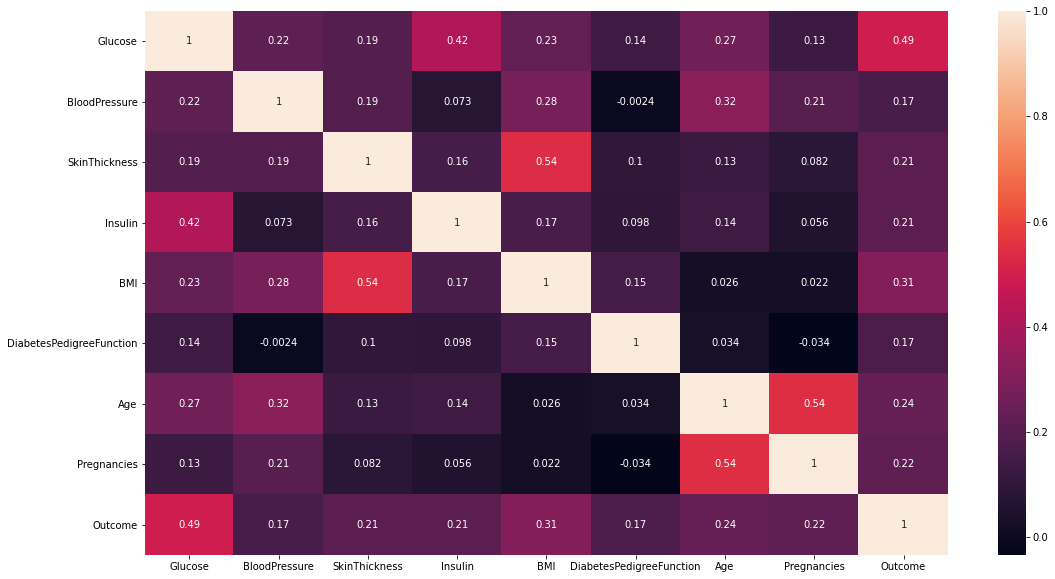

In [41]:
plt.figure(figsize = (18,10))
sns.heatmap(diabetes_df2.corr(), annot = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


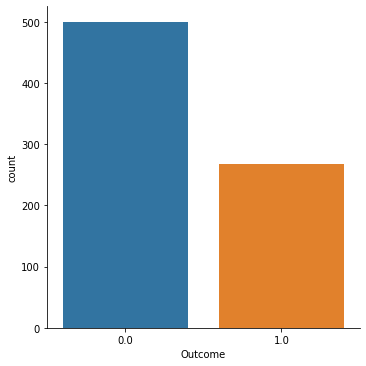

In [80]:
sns.catplot('Outcome', kind = 'count', data = diabetes_df2)

In [81]:
X = diabetes_df2.drop('Outcome', axis = 1)

In [82]:
Y = diabetes_df2['Outcome']

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [151]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver = 'liblinear', C = 1e9, max_iter=1e8, multi_class='ovr')

In [152]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000.0, multi_class='ovr', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [153]:
logit_model.score(X_test, Y_test)

0.8116883116883117

In [154]:
prediction = logit_model.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, prediction)

array([[89, 11],
       [18, 36]])

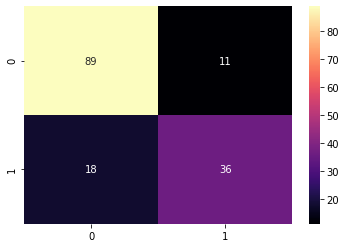

In [156]:
sns.heatmap(confusion_matrix(Y_test, prediction), cmap='magma', annot=True)